In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import re
import shutil
import time
from datetime import datetime
from datetime import timedelta
pd.set_option('display.max_columns',None)
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [2]:
'''loading data'''
path=os.getcwd()
df=pd.read_excel(path+'\\datasource.xlsx',sheet_name='饼图',parse_dates=True)
first_layer=df.groupby('类型').sum().reset_index()
second_layer=df.loc[df['类型']=='类型4',:].reset_index()
print(df.info())
display('df','first_layer','second_layer')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
类型     24 non-null object
子类型    24 non-null object
数量     24 non-null int64
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes
None


,类型,子类型,数量
0,类型1,类型1-1,13
1,类型1,类型1-2,12
2,类型1,类型1-3,10
3,类型1,类型1-4,19
4,类型2,类型2-5,10
5,类型2,类型2-6,13
6,类型2,类型2-7,21
7,类型2,类型2-8,20
8,类型2,类型2-9,17
9,类型3,类型3-10,21


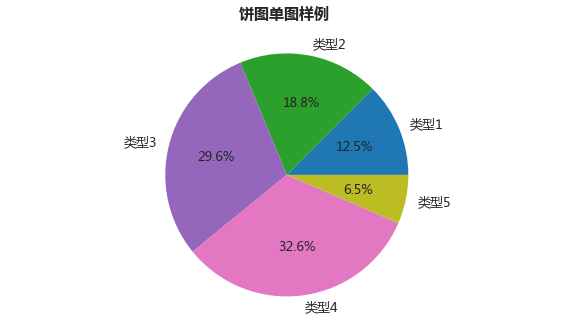

In [11]:
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

'''plot single pie picts'''
set_colors=cm.tab10(np.arange(len(first_layer['数量']))/len(first_layer['数量']))
fig=plt.figure(figsize=(10,5))
plt.pie(first_layer['数量'],labels=first_layer['类型'],
        autopct='%1.1f%%',shadow=False,textprops=dict(size=13),colors=set_colors)
plt.axis('equal') 
#对整体图像设置标题b
plt.title("饼图单图样例 ",fontsize=15,fontweight='bold',pad=20)
#保存图片 
plt.savefig('饼图单图样例.png',bbox_inches='tight')

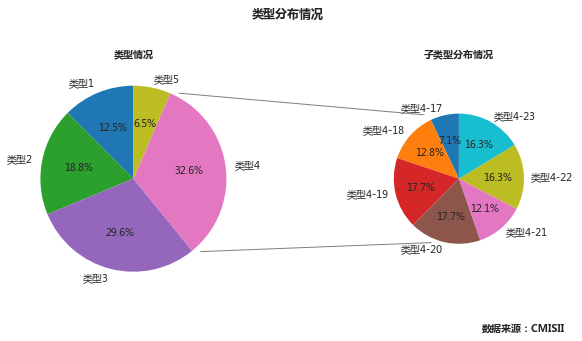

In [12]:
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

from matplotlib.lines import Line2D
from matplotlib import cm
#设置图像基本设置
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1) #设置第一个坐标轴为极坐标体系
ax2=fig.add_subplot(1,2,2) #设置第二个坐标轴为极坐标体系
fig.subplots_adjust(wspace=0.4) #设置子图间的间距，为子图宽度的40%
plt.suptitle('类型分布情况',fontweight='bold') #对整体图像设置标题

 #绘类型明细
ax1_colors=cm.tab10(np.arange(len(first_layer['数量']))/len(first_layer['数量']))
ax1.pie(first_layer['数量'],labels=first_layer['类型'],
        autopct='%1.1f%%',shadow=False,
        startangle=90,textprops={'fontsize':10},colors=ax1_colors)
ax1.set_title('类型情况',fontsize=10,fontweight='bold')

#绘子类型明细
ax2_colors=cm.tab10(np.linspace(0,1,len(second_layer['数量'])))
ax2.pie(second_layer['数量'],labels=second_layer['子类型'], \
        autopct='%1.1f%%',shadow=False,startangle=90,
        textprops={'fontsize':10},colors=ax2_colors,radius=0.7)
ax2.set_title('子类型分布情况',fontsize=10,fontweight='bold')

# 绘制斜线
line1 = Line2D([0.35,0.69],[0.74,0.68], transform=fig.transFigure, figure=fig, color="grey",linewidth=1)
line2 = Line2D([0.38,0.7],[0.3,0.325], transform=fig.transFigure, figure=fig, color="grey",linewidth=1)
fig.lines.extend([line1,line2])
#对整体图像设置标题
plt.text(0.77, 0.08, '数据来源：CMISII',fontsize=10,
         fontweight='bold',transform=fig.transFigure)
#保存图片 
plt.savefig('饼图双图样例.png',bbox_inches='tight')

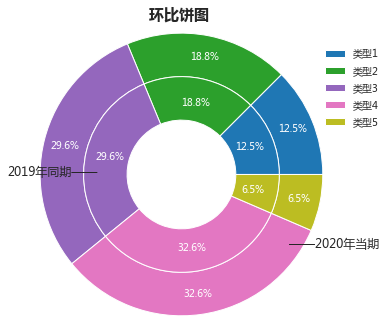

In [5]:
%matplotlib inline
import matplotlib.style as style
from matplotlib.ticker import FuncFormatter
plt.style.use('seaborn-whitegrid')
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

from matplotlib.lines import Line2D
from matplotlib import cm
fig=plt.figure(figsize=(8,5))
# colormapList=["#ff7f00","#e41a1c","#4daf4a","#377eb8","#984ea3"]
colormapList=cm.tab10(np.arange(len(first_layer['数量']))/len(first_layer['数量']))
outer_colors=colormapList
inner_colors=colormapList
wedges1,texts1,autotexts1=plt.pie(first_layer['数量'],
                                 autopct="%.1f%%",
                                 radius=1.3,
                                 pctdistance=0.85,
                                 colors=outer_colors,
                                 textprops=dict(color="w"),
                                 wedgeprops=dict(width=0.4,edgecolor="w")
                                 )
wedges2,texts2,autotexts2=plt.pie(first_layer['数量'],
                                 autopct="%.1f%%",
                                 radius=0.9,
                                 pctdistance=0.75,
                                 colors=outer_colors,
                                 textprops=dict(color="w"),
                                 wedgeprops=dict(width=0.4,edgecolor="w"))
plt.legend(wedges1,
          first_layer['类型'],
          fontsize=10,
          loc="best",
          bbox_to_anchor=(0.91,0,0.35,1)
          )
plt.title("环比饼图 ",fontsize=15,fontweight='bold',pad=20, loc='center')
plt.text(0.21,0.5,'2019年同期——',fontsize=12,transform=fig.transFigure)  #标注文字比分
plt.text(0.7,0.3,'——2020年当期',fontsize=12,transform=fig.transFigure) 
# plt.annotate('2019年同期 ',
#                    xy=(-1,0.5),  #箭头位置
#                    xytext=(0.1,0.5), #注释位置
#                    arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-0.2')
#     )
plt.savefig('环比饼图.png')